파이썬 라이브러리를 활용한 머신러닝
[예제](https://github.com/rickiepark/introduction_to_ml_with_python/tree/master/data)

### Decision tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer= load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify= cancer.target,
                                                  random_state= 42)

In [4]:
tree= DecisionTreeClassifier(random_state= 0)

In [5]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [6]:
print('train정확도{:8.3f}'.format(tree.score(X_train, y_train)))
print('test 정확도{:8.3f}'.format(tree.score(X_test, y_test)))

train정확도   1.000
test 정확도   0.937


In [7]:
def dtClassifyShow(max_depth= None):
    tree= DecisionTreeClassifier(random_state= 0, max_depth= max_depth)
    tree.fit(X_train, y_train)
    accu_train= '{:.5f}'.format(tree.score(X_train, y_train))
    accu_test= '{:.5f}'.format(tree.score(X_test, y_test))
    
    return float(accu_train), float(accu_test)

In [8]:
dtClassifyShow()

(1.0, 0.93706)

In [9]:
dtClassifyShow(4)

(0.98826, 0.95105)

In [10]:
trainPitch= 0
testMax= 0
iMax= 0
for i in range(1,19):
    accTr, accTs= dtClassifyShow(i)
    if testMax <= accTs:
        trainPitch= accTr
        testMax= accTs
        iMax= i

trainPitch, testMax, iMax

(0.99531, 0.95105, 5)

In [11]:
dtClassifyShow(5)

(0.99531, 0.95105)

how to set: graphviz
- pip install graphviz
- [msi](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) install
- 환경변수설정> \Program Files (x86)\Graphviz2.38\bin

In [12]:
from sklearn.tree import export_graphviz

In [14]:
export_graphviz(tree, out_file= "data/tree.dot", class_names=["악성","양성"],
               feature_names= cancer.feature_names,
               impurity=False, filled= True)

In [15]:
import graphviz

In [16]:
with open("data/tree.dot", encoding='utf-8') as f:
    dot_graph= f.read()

In [19]:
dot= graphviz.Source(dot_graph)

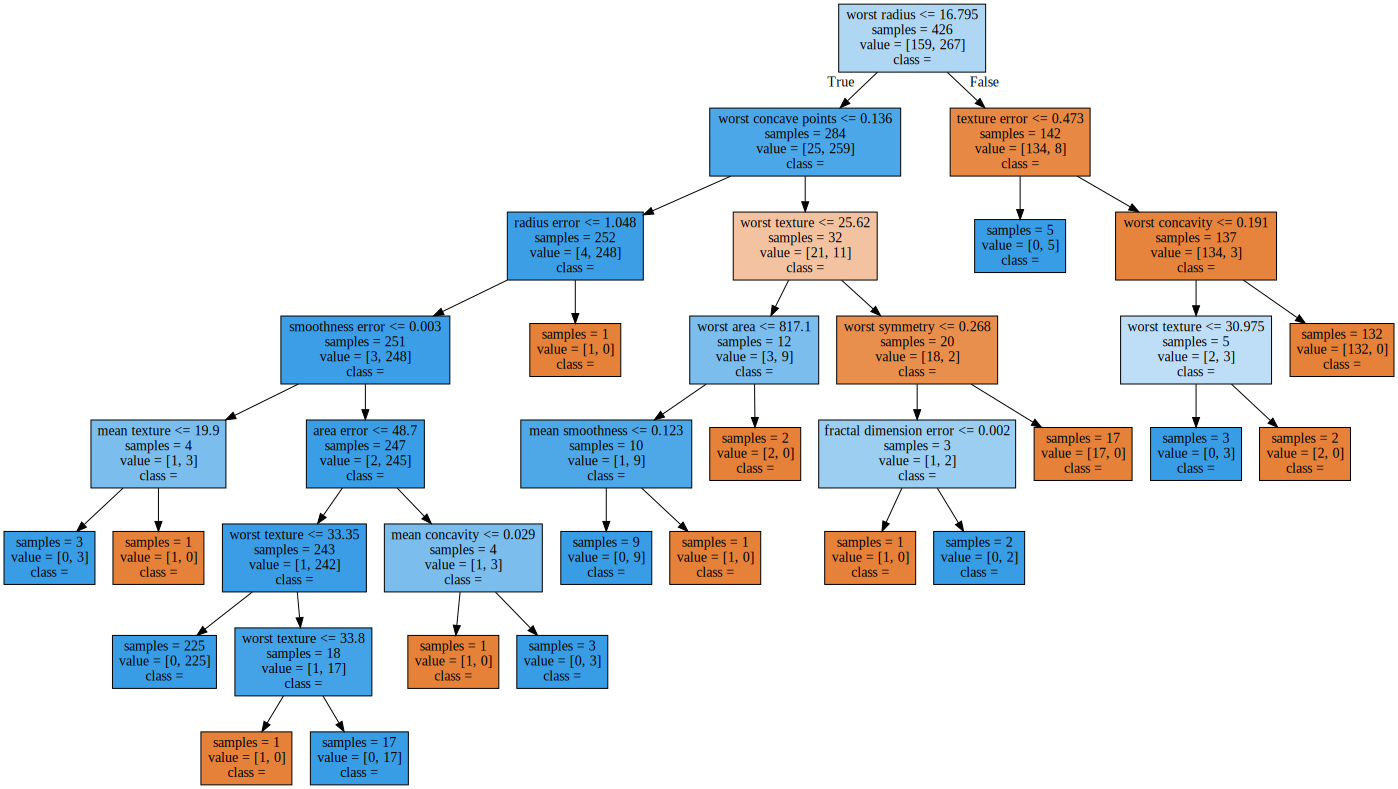

In [20]:
display(dot)

In [23]:
#!mkdir result
%ls

 D 드라이브의 볼륨: New Volume
 볼륨 일련 번호: 16AC-7728

 D:\github\dataAnal_py_basic\forEducation 디렉터리

2018-07-17  오후 07:53    <DIR>          .
2018-07-17  오후 07:53    <DIR>          ..
2018-07-17  오후 06:50    <DIR>          .ipynb_checkpoints
2018-07-17  오후 06:53    <DIR>          data
2018-07-17  오후 07:53            47,940 decisionTree.ipynb
2018-07-17  오후 07:53    <DIR>          result
               1개 파일              47,940 바이트
               5개 디렉터리  966,092,644,352 바이트 남음


In [33]:
# dot.format= 'png'
dot.render(filename= 'result/treeSample')

'result/treeSample.png'

In [28]:
%cd result
%ls
%cd ..

D:\github\dataAnal_py_basic\forEducation\result
 D 드라이브의 볼륨: New Volume
 볼륨 일련 번호: 16AC-7728

 D:\github\dataAnal_py_basic\forEducation\result 디렉터리

2018-07-17  오후 08:07    <DIR>          .
2018-07-17  오후 08:07    <DIR>          ..
2018-07-17  오후 08:07             3,938 treeSample
2018-07-17  오후 08:07           180,351 treeSample.png
               2개 파일             184,289 바이트
               2개 디렉터리  966,092,455,936 바이트 남음
D:\github\dataAnal_py_basic\forEducation
